In [1]:
import scanpy as sc, scanpy
import anndata
import numpy as np , pandas as pd 
# TensorFlow and tf.keras
import sklearn

from tqdm import tqdm
import tensorflow as tf , tensorflow
from tensorflow import keras
import anndata
import scipy.io
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy.api as sc
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler , MaxAbsScaler
#import sklearn.model_selection , sklearn.cross_validation
import os,glob
print(tf.__version__)
from sklearn.utils import resample
import copy
sc.settings.set_figure_params(dpi=200)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_ml
#from pandas_ml import ConfusionMatrix
import pickle
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import diffxpy.api as de







import tensorflow as tf
import matplotlib
#matplotlib.use('PS')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#np.random.seed(0)
from scipy import stats
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta , Adam
from tensorflow.keras import backend as K



/ahg/regevdata/users/edv/software/anaconda3/envs/st/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,
Using TensorFlow backend.


2.1.0


In [2]:
result_prefix = 'nasal/' #'internal_human_lung/' , 'gut/' , 'lung_european/', 'internal_fibroblast_only/' , 'nasal/'
sc.settings.figdir = result_prefix

gene1='ACE2'
gene2='TMPRSS2'



In [3]:
def set_fig_params() : 
    rcParams.update(matplotlib.rcParamsDefault)
    rcParams['pdf.fonttype'] = 42
    sns.set(context = 'paper' , style='ticks' , 
            rc = {
                'figure.autolayout' : True,
                'axes.titlesize' : 8 ,
                'axes.titleweight' :'bold',

                'figure.titleweight' : 'bold' ,
                'figure.titlesize' : 8 ,

                'axes.labelsize' : 8 ,
                'axes.labelpad' : 2 ,
                'axes.labelweight' : 'bold' , 
                'axes.spines.top' : False,
                'axes.spines.right' : False,

                'xtick.labelsize' : 7 ,
                'ytick.labelsize' : 7 ,

                'legend.fontsize' : 7 ,
                'figure.figsize' : (3.5, 3.5/1.6 ) ,          

                'xtick.direction' : 'out' ,
                'ytick.direction' : 'out' ,

                'xtick.major.size' : 2 ,
                'ytick.major.size' : 2 ,

                'xtick.major.pad' : 2,
                'ytick.major.pad' : 2,

                #'lines.linewidth' : 1            

                 } )

### Patient Specific Features (one hot encode patient id into input)
### Add other covariates that people trust as true


In [4]:
###################################################################################################################  
if result_prefix ==  'internal_human_lung/': 

    if 0 :  # DO NOT TOUCH THIS FLAG.
        full_adata_annotated = sc.read('all-regev-tsankov-lung-newlabels.h5ad')
        barcodes = [barcode.split('-')[0]+"_"+barcode.split('-')[1].split("_")[1] for barcode in full_adata.obs_names]
        full_adata.obs_names = barcodes
        barcodes_annotated = [barcode.split('-')[0:-1][0] for barcode in full_adata_annotated.obs_names]
        full_adata_annotated.obs_names = barcodes_annotated
        full_adata.obs['Cell Type'] = full_adata_annotated.obs['pd_celltype']
        full_adata.obs['pd_distalproximal'] = full_adata_annotated.obs['pd_distalproximal']
        full_adata[full_adata_annotated.obs_names]  = full_adata[full_adata_annotated.obs_names].obs
        full_adata.write('all-regev-tsankov-lung-newlabels.h5ad')
        
        
    full_adata = sc.read('tsankov-mitofilter-processed.h5ad')


    corona_plus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()>0) & (full_adata[:,gene2].X.todense() >0)))
    corona_minus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()==0)&(full_adata[:,gene2].X.todense() ==0)))

    full_adata.obs['corona_plus']= corona_plus
    full_adata.obs['corona_minus']= corona_minus
    #full_adata.X = np.asarray(full_adata.X.todense())
    
    raw_adata = copy.deepcopy(full_adata )
    raw_adata.X = full_adata.layers['counts']


    sc.pp.filter_cells(raw_adata, min_genes=200)
    sc.pp.filter_genes(raw_adata, min_cells=3)

    v2_batches = ['10x_HU28_180121', '10x_HU30_180121', '10x_HU32_180121',
           '10x_HU37_180325', '10x_HU39_180325', '10x_HU40_180901',
           '10x_HU48_180901', '10x_HU49_180901']

    v3_batches = ['10x_HU52_190405', '10x_HU62_190901']



    sc.pp.normalize_total(raw_adata, target_sum=1e4)
    sc.pp.log1p(raw_adata)
    sc.pp.highly_variable_genes(raw_adata, n_top_genes=20000 )


    raw_adata.X = np.asarray(raw_adata.X.todense())
    #raw_adata = raw_adata[((raw_adata.obs.batch.isin(v2_batches) & (raw_adata.obs.percent_mito < 0.10)) |
    #                         (raw_adata.obs.batch.isin(v3_batches) & (raw_adata.obs.percent_mito < 0.20)) )]
    raw_adata = raw_adata[:, raw_adata.var.highly_variable]

    adata = scanpy.AnnData(X = raw_adata.X,
                           obs = raw_adata.obs,
                           var = raw_adata.var,
                           varm = raw_adata.varm,
                           obsm = raw_adata.obsm,
                           uns = raw_adata.uns
                           )
    ##For celltype level analysis
    celltype_summary = adata.obs[['Cell Type','corona_plus','corona_minus']].groupby('Cell Type').sum().corona_plus
    celltype_list = list(celltype_summary[(celltype_summary > 10)].index)
###################################################################################################################  
if result_prefix ==  'gut/': 
    full_adata = sc.read(result_prefix+'gut_adata.h5ad')
    corona_plus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()>0) & (full_adata[:,gene2].X.todense() >0)))
    corona_minus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()==0)&(full_adata[:,gene2].X.todense() ==0)))

    full_adata.obs['corona_plus']= corona_plus
    full_adata.obs['corona_minus']= corona_minus
    full_adata.X = np.asarray(full_adata.X.todense())
    full_adata.obs['nUMI'] = np.sum(full_adata.X,1)

    raw_adata = copy.deepcopy(full_adata )
    sc.pp.filter_cells(raw_adata, min_genes=200)
    sc.pp.filter_genes(raw_adata, min_cells=3)
    
    sc.pp.normalize_total(raw_adata, target_sum=1e4)
    sc.pp.log1p(raw_adata)
    sc.pp.highly_variable_genes(raw_adata, n_top_genes=20000 )##20000 

    raw_adata = raw_adata[:, raw_adata.var.highly_variable]

    adata = scanpy.AnnData(X = raw_adata.X,
                           obs = raw_adata.obs,
                           var = raw_adata.var,
                           varm = raw_adata.varm,
                           obsm = raw_adata.obsm,
                           uns = raw_adata.uns
                           )

    celltype_summary = adata.obs[['Cell Type','corona_plus','corona_minus']].groupby('Cell Type').sum().corona_plus
    celltype_list = list(celltype_summary[(celltype_summary > 10)].index)
    
###################################################################################################################  
if result_prefix ==  'lung_european/': 
    full_adata = sc.read(result_prefix+'lca-processed.h5ad')
    corona_plus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()>0) & (full_adata[:,gene2].X.todense() >0)))
    corona_minus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()==0)&(full_adata[:,gene2].X.todense() ==0)))

    full_adata.obs['corona_plus']= corona_plus
    full_adata.obs['corona_minus']= corona_minus

    raw_adata = copy.deepcopy(full_adata )
    #adata = raw_adata

    raw_adata.X = full_adata.layers['counts']    
    sc.pp.filter_cells(raw_adata, min_genes=200)
    sc.pp.filter_genes(raw_adata, min_cells=3)

    sc.pp.normalize_total(raw_adata, target_sum=1e4)
    sc.pp.log1p(raw_adata)
    sc.pp.highly_variable_genes(raw_adata, n_top_genes=10000 )

    raw_adata.X = np.asarray(raw_adata.X.todense())
    raw_adata = raw_adata[:, raw_adata.var.highly_variable]

    adata = scanpy.AnnData(X = raw_adata.X,
                           obs = raw_adata.obs,
                           var = raw_adata.var,
                           varm = raw_adata.varm,
                           obsm = raw_adata.obsm,
                           uns = raw_adata.uns
                           )
    adata.obs['Cell Type'] = adata.obs['ann_level_3']
    adata.obs['Cell Type'].replace('Ciliated lineage' , 'Ciliated' ,inplace= True)    
    celltype_summary = adata.obs[['Cell Type','corona_plus','corona_minus']].groupby('Cell Type').sum().corona_plus
    celltype_list = list(celltype_summary[(celltype_summary > 10)].index)
    
###################################################################################################################  
if result_prefix ==  'nasal/': 
    full_adata = sc.read('nawijn_nasal.h5ad')
    corona_plus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()>0) & (full_adata[:,gene2].X.todense() >0)))
    corona_minus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()==0)&(full_adata[:,gene2].X.todense() ==0)))

    full_adata.obs['corona_plus']= corona_plus
    full_adata.obs['corona_minus']= corona_minus
    full_adata.obs['nUMI'] = np.sum(full_adata.X,1)


    raw_adata = copy.deepcopy(full_adata )
    #adata = raw_adata

    sc.pp.filter_cells(raw_adata, min_genes=200)
    sc.pp.filter_genes(raw_adata, min_cells=3)

    sc.pp.normalize_total(raw_adata, target_sum=1e4)
    sc.pp.log1p(raw_adata)
    sc.pp.highly_variable_genes(raw_adata, n_top_genes=20000 )

    raw_adata.X = np.asarray(raw_adata.X.todense())
    raw_adata = raw_adata[:, raw_adata.var.highly_variable]

    adata = scanpy.AnnData(X = raw_adata.X,
                           obs = raw_adata.obs,
                           var = raw_adata.var,
                           varm = raw_adata.varm,
                           obsm = raw_adata.obsm,
                           uns = raw_adata.uns
                           )
    adata.obs['Cell Type'] = adata.obs['ann_level_4']
    #adata.obs['Cell Type'].replace('Secretory_2' , 'Sec_Ser_Sup' ,inplace= True)    
    adata.obs['Cell Type'].replace('Goblet-1' , 'Goblet' ,inplace= True)    
    adata.obs['Cell Type'].replace('Goblet-2' , 'Goblet' ,inplace= True)    

    celltype_summary = adata.obs[['Cell Type','corona_plus','corona_minus']].groupby('Cell Type').sum().corona_plus
    celltype_list = list(celltype_summary[(celltype_summary > 1)].index)
    
###################################################################################################################  
if result_prefix ==  'internal_fibroblast_only/': 

    if 0 :  # DO NOT TOUCH THIS FLAG.
        full_adata_annotated = sc.read('all-regev-tsankov-lung-newlabels.h5ad')
        barcodes = [barcode.split('-')[0]+"_"+barcode.split('-')[1].split("_")[1] for barcode in full_adata.obs_names]
        full_adata.obs_names = barcodes
        barcodes_annotated = [barcode.split('-')[0:-1][0] for barcode in full_adata_annotated.obs_names]
        full_adata_annotated.obs_names = barcodes_annotated
        full_adata.obs['Cell Type'] = full_adata_annotated.obs['pd_celltype']
        full_adata.obs['pd_distalproximal'] = full_adata_annotated.obs['pd_distalproximal']
        full_adata[full_adata_annotated.obs_names]  = full_adata[full_adata_annotated.obs_names].obs
        full_adata.write('all-regev-tsankov-lung-newlabels.h5ad')
        
        
    full_adata = sc.read('all-regev-tsankov-lung-newlabels.h5ad')


    corona_plus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()>0) & (full_adata[:,gene2].X.todense() >0)))
    corona_minus = np.ndarray.flatten(np.asarray((full_adata[:,gene1].X.todense()==0)&(full_adata[:,gene2].X.todense() ==0)))

    full_adata.obs['corona_plus']= corona_plus
    full_adata.obs['corona_minus']= corona_minus
    full_adata.X = np.asarray(full_adata.X.todense())


    raw_adata = copy.deepcopy(full_adata )
    raw_adata.X = full_adata.layers['counts']
    
    
    sc.pp.filter_cells(raw_adata, min_genes=200)
    sc.pp.filter_genes(raw_adata, min_cells=3)

    v2_batches = ['10x_HU28_180121', '10x_HU30_180121', '10x_HU32_180121',
           '10x_HU37_180325', '10x_HU39_180325', '10x_HU40_180901',
           '10x_HU48_180901', '10x_HU49_180901']

    v3_batches = ['10x_HU52_190405', '10x_HU62_190901']



    sc.pp.normalize_total(raw_adata, target_sum=1e4)
    sc.pp.log1p(raw_adata)
    sc.pp.highly_variable_genes(raw_adata, n_top_genes=20000 )

    #raw_adata.X = raw_adata.X.todense()
    adata = raw_adata[((raw_adata.obs.batch.isin(v2_batches) & (raw_adata.obs.percent_mito < 0.10)) |
                             (raw_adata.obs.batch.isin(v3_batches) & (raw_adata.obs.percent_mito < 0.20)) )]
    adata = adata[:, adata.var.highly_variable]

    adata = adata[adata.obs['Cell Type']=='Fibroblast']

filtered out 12741 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [5]:
def get_deg_edv(label,deg_adata, obs , n_obs = 1000 ,return_genes=100 , log2fc_min =None) :
    
    obs_with_label = deg_adata.obs[obs] == label
    subsampled_ref = sc.pp.subsample(deg_adata[~(obs_with_label)] ,n_obs=n_obs , copy= 1)
    subsampled_ref.obs[obs] = 'rest'
    subsampled_ref = subsampled_ref[:,deg_adata.var.highly_variable]
    subsampled_test = sc.pp.subsample(deg_adata[(obs_with_label)] ,n_obs=n_obs , copy= 1)
    subsampled_test = subsampled_test[:,deg_adata.var.highly_variable]
    deg_concat_adata = subsampled_test.concatenate(subsampled_ref)

    sc.tl.rank_genes_groups(deg_concat_adata, groupby = obs, method='wilcoxon' , n_genes= return_genes)
    
    return scanpy.get.rank_genes_groups_df(deg_concat_adata , group=label ,log2fc_min =log2fc_min)
    



mito_ribo_genes = np.asarray([i for i in adata.var.index.values if ('MT-' in i) |('RPL' in i) |('RPS' in i) ])




In [6]:
if 0 :
    deg_df_dict = dict()
    deg_genes_list = list()
    for celltype in tqdm(celltype_list):
        deg_df = get_deg_edv(label = celltype,deg_adata = adata,obs='Cell Type',
                            n_obs = (adata.obs['Cell Type'] == celltype).sum() ,
                            return_genes=100);
        deg_df_dict[celltype] = deg_df;
        deg_genes_list = np.union1d(deg_genes_list, deg_df.names.values);
        deg_df_dict[celltype].to_csv(result_prefix+celltype+'_deg.csv')


    

In [7]:
celltype_genelists_dict = dict()


for celltype in tqdm(celltype_list):
    adata_celltype = adata[adata.obs['Cell Type']==celltype]
    classifier_adata = adata_celltype[(adata_celltype.obs['corona_plus'] | adata_celltype.obs['corona_minus'] )]
    classifier_adata = adata_celltype[(adata_celltype.obs['corona_plus'] | adata_celltype.obs['corona_minus'] )]
    classifier_adata.obs['DP_vs_DN'] = 'bla'
    classifier_adata.obs.loc[classifier_adata.obs['corona_plus']==1,'DP_vs_DN'] = 'DP'
    classifier_adata.obs.loc[classifier_adata.obs['corona_plus']==0,'DP_vs_DN'] = 'DN'

    DP_genes_list = get_deg_edv(label = 'DP',deg_adata = classifier_adata,obs='DP_vs_DN' ,
                   n_obs = (classifier_adata.obs['DP_vs_DN'] == 'DP').sum() ,
                   return_genes = 10000 , log2fc_min=0).names.values

    classifier_adata = classifier_adata[:,
                                        np.setdiff1d(
                                        np.setdiff1d(DP_genes_list,[gene1,gene2]) , 
                                        mito_ribo_genes)] #np.setdiff1d(, deg_genes_list) 
    
    #classifier_adata = get_subsampled_adata(classifier_adata) ## Subsamplign because of slack msges
    ### Run the Classifier for each celltype and save gene list
    
    X = classifier_adata.X
    y = classifier_adata.obs['corona_plus']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=0 )


    clf =  sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini',random_state=0 ,
                                                   n_jobs = 50, class_weight='balanced_subsample') #max_depth=4 #
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    #clf.predict_proba(X_test )

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    ordered_importances = importances[indices]
    ordered_genes = classifier_adata.var.index[indices]
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)    
    feature_importance_df = pd.DataFrame( data=ordered_importances , columns = {'Feature Importance'},
                                    index = ordered_genes )    
    feature_importance_df.to_csv(result_prefix+celltype+'_gene_list.csv')
    celltype_genelists_dict[celltype] = feature_importance_df
        
    go_top_n_genes =500
    signature_genes = list(ordered_genes[:go_top_n_genes])
    sc.tl.score_genes(full_adata, signature_genes, score_name='ACE2+TMPRSS2+ signature score') 


    go_df = sc.queries.enrich(signature_genes, org="hsapiens", gprofiler_kwargs=dict(no_evidences=False))
    go_df['neg_log10_p_value'] = -np.log10(go_df['p_value'])
    go_df.to_csv(result_prefix+celltype+'go_enrichment.csv')    
    n_genes = 100
    feature_importance_df = pd.DataFrame( data=ordered_importances[:n_genes] , columns = {'Feature Importance'},
                                        index = ordered_genes[0:n_genes] )

    set_fig_params()
    fig = plt.figure( figsize =(7.2*2 , 7.2*2) , dpi=200)
    ax = sns.barplot(x='Feature Importance',y=ordered_genes[:n_genes],data=feature_importance_df ,  
                     edgecolor='black',linewidth = 0.25 , palette='RdPu_r')
    ax.grid(False)
    plt.title('ACE2+TMPRSS2+ | Top Enriched Genes')
    plt.savefig(result_prefix+celltype+'ACE2+TMPRSS2+_top_enriched_genes.pdf')


    if 0 : 
        set_fig_params()
        for source in np.unique(go_df['source']) : 
            fig = plt.figure( figsize =(7.2*2 , 7.2) , dpi=200)
            ax = sns.barplot(x='neg_log10_p_value',y='name', data= go_df[go_df['source']==source] ,  
                             edgecolor='black',linewidth = 0.25 , palette='RdPu_r')
            plt.xlabel('$-log_{10}(pval)$')
            plt.title('ACE2+TMPRSS2+ | Significant '+source+' Terms')
            plt.savefig(result_prefix+celltype+'ACE2+TMPRSS2+_top_enriched_goterms_'+source+'.pdf')





    if result_prefix ==  'internal_human_lung/': 
        scanpy.set_figure_params(scanpy=True, dpi=80, dpi_save=200, figsize =(7.2 , 7.2) )

        sc.pl.umap(full_adata , color =  ['ACE2+TMPRSS2+ signature score' , 'Cell Type' ] , size=(7.2,7.2) ,
                  save=celltype+'_signature_score_celltypes.pdf', show = 0 )



    if result_prefix ==  'lung_european/': 
        scanpy.set_figure_params(scanpy=True, dpi=80, dpi_save=200, figsize =(7.2 , 7.2) )

        sc.pl.umap(full_adata , color =  ['ACE2+TMPRSS2+ signature score' , 'ann_level_2' ] , size=(7.2,7.2) ,
                  save=celltype+'_signature_score_celltypes.pdf', show =0)



    signature_classifier_adata = full_adata[classifier_adata.obs_names] 

    Double_Positive = signature_classifier_adata[signature_classifier_adata.obs['corona_plus']].obs['ACE2+TMPRSS2+ signature score']
    Double_Negative = signature_classifier_adata[signature_classifier_adata.obs['corona_minus']].obs['ACE2+TMPRSS2+ signature score']

    ranksum_pval = scipy.stats.ranksums(Double_Positive,Double_Negative)
    ks2samp_pval = scipy.stats.ks_2samp(Double_Positive,Double_Negative)

    set_fig_params()

    fig = plt.figure( figsize =(7.2, 7.2/1.6 ) , dpi=200)


    if ((result_prefix ==  'internal_human_lung/') | (result_prefix ==  'lung_european/') |
       (result_prefix ==  'internal_fibroblast_only/') ): 
        sns.kdeplot((Double_Positive) , shade=1 , color=sns.color_palette("RdBu_r", 10)[-1] ,label='ACE2+TMPRSS2+ Cells' )
        sns.kdeplot((Double_Negative) , shade=1, color=sns.color_palette("RdBu_r", 10)[0], label='ACE2-TMPRSS2- Cells'  )
        plt.xlabel('Signature Score')


    if ((result_prefix ==  'gut/') | (result_prefix ==  'nasal/')): 
        sns.kdeplot(np.log2(Double_Positive) , shade=1 , color=sns.color_palette("RdBu_r", 10)[-1] ,label='ACE2+TMPRSS2+ Cells' )
        sns.kdeplot(np.log2(Double_Negative) , shade=1, color=sns.color_palette("RdBu_r", 10)[0], label='ACE2-TMPRSS2- Cells'  )
        plt.xlabel('$log_{2}(Signature Score)$')



    ax.grid(False)


    plt.ylabel('Density')
    plt.title('Wilcoxon Rank-sum test | Statistic = {:.3f} | p-val = {:.3f} \n \
    K-S Two-sample test | Statistic = {:.3f} | p-val = {:.3f}'.format(ranksum_pval[0],ranksum_pval[1],
                                                                      ks2samp_pval[0],ks2samp_pval[1]))
    plt.savefig(result_prefix+celltype+'ACE2+TMPRSS2+_kde_pvals.pdf')

    plt.close('all')
        #plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]Trying to set attribute `.obs` of view, copying.


ranking genes


... storing 'Cell Type' as categorical
... storing 'DP_vs_DN' as categorical


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
0.9406392694063926
computing score 'ACE2+TMPRSS2+ signature score'
    finished: added
    'ACE2+TMPRSS2+ signature score', score of gene set (adata.obs) (0:00:00)


/ahg/regevdata/users/edv/software/anaconda3/envs/st/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/ahg/regevdata/users/edv/software/anaconda3/envs/st/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/ahg/regevdata/users/edv/software/anaconda3/envs/st/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
 50%|█████     | 1/2 [00:08<00:08,  8.39s/it]Trying to set attribute `.obs` of view, copying.


ranking genes


... storing 'Cell Type' as categorical
... storing 'DP_vs_DN' as categorical


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
0.9671957671957672
computing score 'ACE2+TMPRSS2+ signature score'
    finished: added
    'ACE2+TMPRSS2+ signature score', score of gene set (adata.obs) (0:00:00)


/ahg/regevdata/users/edv/software/anaconda3/envs/st/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/ahg/regevdata/users/edv/software/anaconda3/envs/st/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/ahg/regevdata/users/edv/software/anaconda3/envs/st/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
100%|██████████| 2/2 [00:17<00:00,  8.69s/it]


In [8]:
gene_list_combined = []
#top_n_genes=5000

for celltype in celltype_list:
    important_gene_indices = (celltype_genelists_dict[celltype] >0).values.flatten()
    gene_list = list(celltype_genelists_dict[celltype][important_gene_indices].index.values) #list(celltype_genelists_dict[celltype_list[i]].sort_values('Feature Importance',ascending=0).index[:top_n_genes])
    gene_list_combined += gene_list  
    
gene_list_combined = np.asarray(gene_list_combined)
unique_freq= np.unique(gene_list_combined,return_counts=1)
gene_list_combined_df = pd.DataFrame(index = unique_freq[0] , columns = {'freq' })
gene_list_combined_df['freq']=unique_freq[1]
gene_list_combined_df= gene_list_combined_df.sort_values('freq',ascending=0)

#ordered_genes = list(gene_list_combined_df.index)[:top_n_genes]

### Combine Results by Running the RF again on the pooled gene list

### Distribution Matching - May need to divide by bin size to get proportions

In [9]:
    
def get_subsampled_adata(classifier_adata) : 
    dp_numi_dist = classifier_adata[classifier_adata.obs['DP_vs_DN']=='DP'].obs.nUMI.astype('float32').values
    dp_numi_hist = np.histogram(dp_numi_dist , bins=100)

    #if result_prefix ==  'internal_human_lung/' : 
    #    dp_numi_hist = np.histogram(dp_numi_dist ,bins =100)
    #if result_prefix ==  'gut/' : 
    #    dp_numi_hist = np.histogram(dp_numi_dist ,bins =100)
        
    dn_numi = classifier_adata[classifier_adata.obs['DP_vs_DN']=='DN'].obs.nUMI.astype('float' ,copy  = 1)

    dn_obs_list = []
    bin_min= 0
    for bin_size, bin_max in zip(dp_numi_hist[0], dp_numi_hist[1]) :
        dn_bin_indices = list(dn_numi[(dn_numi> bin_min) & (dn_numi < bin_max)].index.values)
        if dn_bin_indices !=[] :
            dn_obs_list = dn_obs_list + list(np.random.choice(dn_bin_indices ,size = bin_size ))
        bin_min = bin_max 

    dp_obs_list = list(classifier_adata[classifier_adata.obs['DP_vs_DN']=='DP'].obs_names)



    subsampled_obs_list = dn_obs_list + dp_obs_list
    subsampled_classifier_adata = classifier_adata[subsampled_obs_list]

    return subsampled_classifier_adata



classifier_adata = adata[adata.obs['Cell Type'].isin(celltype_list)]
classifier_adata = classifier_adata[:,gene_list_combined_df.index]
classifier_adata = classifier_adata[(classifier_adata.obs['corona_plus'] | classifier_adata.obs['corona_minus'] )]
classifier_adata.obs['DP_vs_DN'] = 'bla'
classifier_adata.obs.loc[classifier_adata.obs['corona_plus']==1,'DP_vs_DN'] = 'DP'
classifier_adata.obs.loc[classifier_adata.obs['corona_plus']==0,'DP_vs_DN'] = 'DN'





##################
dp_pre = (classifier_adata[classifier_adata.obs['DP_vs_DN']=='DP'].obs.nUMI) 
dn_pre = (classifier_adata[classifier_adata.obs['DP_vs_DN']=='DN'].obs.nUMI) 



##################


classifier_adata = get_subsampled_adata(classifier_adata)  ## SUBSAMPLING BECAUSE OF SLACK  
##################
dp_post= (classifier_adata[classifier_adata.obs['DP_vs_DN']=='DP'].obs.nUMI) 
dn_post= (classifier_adata[classifier_adata.obs['DP_vs_DN']=='DN'].obs.nUMI) 

##################



Trying to set attribute `.obs` of view, copying.


/ahg/regevdata/users/edv/software/anaconda3/envs/st/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


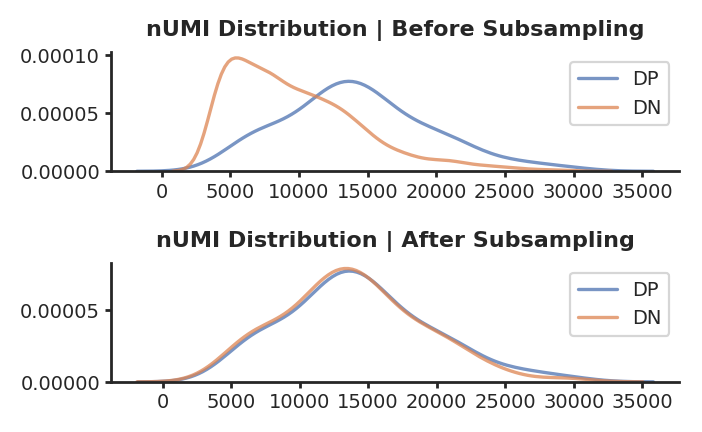

In [10]:
set_fig_params()
fig , ax_= plt.subplots( figsize =(3.6, 3.6/1.6) , dpi=200 , nrows = 2 , ncols=1)

sns.kdeplot(dp_pre, label = 'DP' , ax=ax_[0] , alpha = 0.75)
sns.kdeplot(dn_pre, label = 'DN', ax=ax_[0], alpha = 0.75)

sns.kdeplot(dp_post, label = 'DP' , ax=ax_[1], alpha = 0.75)
sns.kdeplot(dn_post, label = 'DN', ax=ax_[1], alpha = 0.75)

#plt.title('nUMI distribution')
#plt.show()

ax.grid(False)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xticks([])
ax_[0].set_title('nUMI Distribution | Before Subsampling')
ax_[1].set_title('nUMI Distribution | After Subsampling')



plt.savefig(result_prefix+'nUMI_distributions.pdf')
plt.show()
#plt.close(fig)



In [11]:

X = classifier_adata.X
y = classifier_adata.obs['corona_plus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=0 )


clf = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=0 ,
                             n_jobs = 50 , class_weight='balanced_subsample') #max_depth=4
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
#clf.predict_proba(X_test )

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
ordered_importances = importances[indices]
ordered_genes = classifier_adata.var.index[indices]
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
pd.DataFrame(ordered_genes).to_csv(result_prefix+'gene_list.csv')

feature_importance_df = pd.DataFrame( data=ordered_importances , columns = {'Feature Importance'},
                                index = ordered_genes )



0.651685393258427


### Generate and Save Results and Plots

In [12]:
go_top_n_genes =500
signature_genes = list(ordered_genes[:go_top_n_genes])
go_df = sc.queries.enrich(signature_genes, org="hsapiens", gprofiler_kwargs=dict(no_evidences=False))
go_df['neg_log10_p_value'] = -np.log10(go_df['p_value'])

go_df.to_csv(result_prefix+'go_enrichment.csv')

In [13]:
n_genes = 100
feature_importance_df = pd.DataFrame( data=ordered_importances[:n_genes] , columns = {'Feature Importance'},
                                    index = ordered_genes[0:n_genes] )

set_fig_params()
fig = plt.figure( figsize =(7.2*2 , 7.2*2) , dpi=200)

ax = sns.barplot(x='Feature Importance',y=ordered_genes[:n_genes],data=feature_importance_df ,  
                 edgecolor='black',linewidth = 0.25 , palette='RdPu_r')

ax.grid(False)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xticks([])
plt.title('ACE2+TMPRSS2+ | Top Enriched Genes')
plt.savefig(result_prefix+'ACE2+TMPRSS2+_top_enriched_genes.pdf')
#plt.show()
#plt.close(fig)



In [14]:
set_fig_params()


for source in np.unique(go_df['source']) : 
    fig = plt.figure( figsize =(7.2*8 , 7.2*2) , dpi=200)


    ax = sns.barplot(x='neg_log10_p_value',y='name', data= go_df[go_df['source']==source] ,  
                     edgecolor='black',linewidth = 0.25 , palette='RdPu_r')

    #plt.axvline(-np.log10(0.05) , c = 'k' , linestyle = 'dashed')
    #ax.grid(False)

    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('$-log_{10}(pval)$')
    plt.title('ACE2+TMPRSS2+ | Significant '+source+' Terms | '+' EDV')
    plt.savefig(result_prefix+'ACE2+TMPRSS2+_top_enriched_goterms_'+source+'.pdf')
    #plt.show()




In [15]:
sc.tl.score_genes(full_adata, signature_genes, score_name='ACE2+TMPRSS2+ signature score') 

if result_prefix ==  'internal_human_lung/': 
    scanpy.set_figure_params(scanpy=True, dpi=80, dpi_save=200, figsize =(7.2 , 7.2) )

    sc.pl.umap(full_adata , color =  ['ACE2+TMPRSS2+ signature score' , 'Cell Type' ] , size=(7.2,7.2) ,
              save='_signature_score_celltypes.pdf' , show =0)



if result_prefix ==  'lung_european/': 
    scanpy.set_figure_params(scanpy=True, dpi=80, dpi_save=200, figsize =(7.2 , 7.2) )

    sc.pl.umap(full_adata , color =  ['ACE2+TMPRSS2+ signature score' , 'ann_level_2' ] , size=(7.2,7.2) ,
              save='_signature_score_celltypes.pdf', show=0)



computing score 'ACE2+TMPRSS2+ signature score'
    finished: added
    'ACE2+TMPRSS2+ signature score', score of gene set (adata.obs) (0:00:00)


In [16]:
signature_classifier_adata = full_adata[classifier_adata.obs_names] 

Double_Positive = signature_classifier_adata[signature_classifier_adata.obs['corona_plus']].obs['ACE2+TMPRSS2+ signature score']
Double_Negative = signature_classifier_adata[signature_classifier_adata.obs['corona_minus']].obs['ACE2+TMPRSS2+ signature score']

ranksum_pval = scipy.stats.ranksums(Double_Positive,Double_Negative)
ks2samp_pval = scipy.stats.ks_2samp(Double_Positive,Double_Negative)






set_fig_params()

fig = plt.figure( figsize =(2*7.2, 2*7.2/1.6 ) , dpi=200)


if ((result_prefix ==  'internal_human_lung/') | (result_prefix ==  'lung_european/') |
   (result_prefix ==  'internal_fibroblast_only/') ): 
    sns.kdeplot((Double_Positive) , shade=1 , color=sns.color_palette("RdBu_r", 10)[-1] ,label='ACE2+TMPRSS2+ Cells' )
    sns.kdeplot((Double_Negative) , shade=1, color=sns.color_palette("RdBu_r", 10)[0], label='ACE2-TMPRSS2- Cells'  )
    plt.xlabel('Signature Score')


if ((result_prefix ==  'gut/') | (result_prefix ==  'nasal/')): 
    sns.kdeplot(np.log2(Double_Positive) , shade=1 , color=sns.color_palette("RdBu_r", 10)[-1] ,label='ACE2+TMPRSS2+ Cells' )
    sns.kdeplot(np.log2(Double_Negative) , shade=1, color=sns.color_palette("RdBu_r", 10)[0], label='ACE2-TMPRSS2- Cells'  )
    plt.xlabel('$log_{2}(Signature Score)$')



ax.grid(False)


plt.ylabel('Density')
plt.title('Wilcoxon Rank-sum test | Statistic = {:.3f} | p-val = {:.3f} \n \
K-S Two-sample test | Statistic = {:.3f} | p-val = {:.3f}'.format(ranksum_pval[0],ranksum_pval[1],
                                                                  ks2samp_pval[0],ks2samp_pval[1]))
plt.savefig(result_prefix+'ACE2+TMPRSS2+_kde_pvals.pdf')

plt.close('all')
#plt.show()